# **MÓDULO 15 - Exercício**
# Análise  - A segunda etapa da Pré Modelagem

# 1) O primeiro exercício é o de salvar a base que criaram na atividade do módulo anterior em csv e abrir ela neste arquivo.
Igual fizemos no início do módulo atual no início da primeira aula.

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

In [161]:
df=pd.read_csv('CHURN_TELECON_MOD08_TAREFA_CORRIGIDA.csv')

df.head()

,customerID,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Serviço_Telefonico,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,Forma_Pagamento,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,Dsl,No,No,No,Month-To-Month,Electronic Check,29.850000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,Dsl,Yes,No,No,One Year,Mailed Check,56.950000,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,Dsl,Yes,No,No,Month-To-Month,Mailed Check,53.850000,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,Dsl,Yes,Yes,No,One Year,Bank Transfer (Automatic),65.607563,1840.75,No
4,8191-XWSZG,Female,0,No,No,52,Yes,No,No internet service,No internet service,No internet service,One Year,Mailed Check,65.607563,1022.95,No


# 2) Comece pela análise univariada:

A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.

B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?

C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.

D) Verifique se os dados das variáveis Booleanas são balanceados ou não.

## Explicação 2.a:
#### Coluna 'Idoso':
Por se tratar de uma coluna com números booleanos, não traz muitas informações relevantes no momento.
#### Coluna 'Tempo_como_Cliente':
A média e a mediana parecem estar bem balanceadas, apesar de termos uma média um pouco maior que a mediana, a diferença entre elas é pouca.
Um ponto interessante a se observar é a grande diferença entre o Q1 e o Q3.
#### Coluna 'Pagamento_Mensal':
Essa coluna tinha mais de 13% das informações nulas no exercício anterior, foi feito a substituição desses valores faltantes pela média, por isso podemos ver uma média indêntica a mediana. Temos um salto entre o minímo e o Q1, foras isso, a coluna parece bem distribuida.
#### Coluna 'Total_Pago':
Aqui vemos uma média muito distante da mediana, o desvio padrão também está muito alto. Muito provavel que encontremos outliers nessa coluna. Além disso, podemos ver uma grande diferença entre o Q1 e o Q3.

## Explicação 2.b:
Acredito que a coluna **Tempo_como_Cliente** possa ter a presença de outliers, por conta da grande diferenças entre o Q1 e o Q3.

Outra coluna que está chamndo atenção é a **Total_Pago**, aqui temos uma média muito distante da mediana e quartis sem simetria alguma.


## Explicação 2.c:
#### Coluna 'Churn':
Primeiramente, vamos analisar a variável preditora. Podemos observar que nossa taxa de churn é de 26%, um percentual aceitável, mas que ainda apresenta oportunidades de melhoria visando reduzir esse índice.

#### Coluna 'Tempo_como_Cliente':
Aqui fica nítido um movimento de churn a partir dos 6 meses. Devemos investigar as causas desse fenômeno e entender por que nossos clientes não permanecem com os serviços contratados. Muito provavelmente, há algum problema relacionado à disponibilidade ou qualidade dos serviços oferecidos.

#### Coluna 'Pagamento_Mensal':
Observamos a existência de dois pacotes de serviços com maior adesão: provavelmente um pacote básico e um intermediário. Precisamos avaliar se a entrega desses serviços está alinhada ao valor cobrado.

#### Coluna 'Total_Pago':
Podemos observar uma distribuição bastante irregular entre os quartis. Embora o gráfico não apresente outliers, consideramos relevante investigar mais a fundo esse comportamento. Além disso, a análise indica que os clientes que permanecem conosco tendem a contratar pacotes de serviços mais caros, o que acaba elevando nosso terceiro quartil (Q3).

## Explicação 2.d:
#### Colunaa Balanceadas:
1. Casado
2. Gênero

#### Colunaa Desbalanceadas:
1. Serviço Telefônico
2. Serviço de Segurança
3. Idoso
4. Suporte Técnico
5. Streaming Tv
6. Dependentes

Obs: Nas colunas: **Serviço de Segurança**, **Suporte Técnico** e **Streaming de TV**, eu substitui a resposta **'No internet service'** por **'No'**, para facilitar a visulização.

#### Análise:
Observamos um bom equilíbrio nas colunas **Casado** e **Gênero**, indicando que nossos clientes estão bem distribuídos nessas categorias.

Na coluna **Serviço Telefônico**, verificamos que a grande maioria dos clientes possui esse serviço, o que sugere ser este o principal produto da nossa marca.

Já nas colunas **Serviço de Segurança**, **Suporte Técnico** e **Streaming de TV**, a adesão é significativamente menor. Esse padrão pode indicar: Valores muito altos para esses serviços ou insatisfação dos clientes com a qualidade oferecida.

Outro ponto relevante é que a maioria dos nossos clientes não são **Idosos** e não possuem **Dependentes**.

In [259]:
df.describe()

,Idoso,Tempo_como_Cliente,Pagamento_Mensal,Total_Pago
count,2488.000000,2488.000000,2488.000000,2488.000000
mean,0.161576,32.352090,65.607563,2290.087178
std,0.368135,24.636885,27.984700,2264.585643
min,0.000000,0.000000,18.400000,18.800000
25%,0.000000,8.000000,45.400000,402.337500
50%,0.000000,29.000000,65.607563,1402.900000
75%,0.000000,56.000000,87.712500,3867.162500
max,1.000000,72.000000,118.650000,8564.750000


C:\Users\large\AppData\Local\Temp\ipykernel_9792\2183340029.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



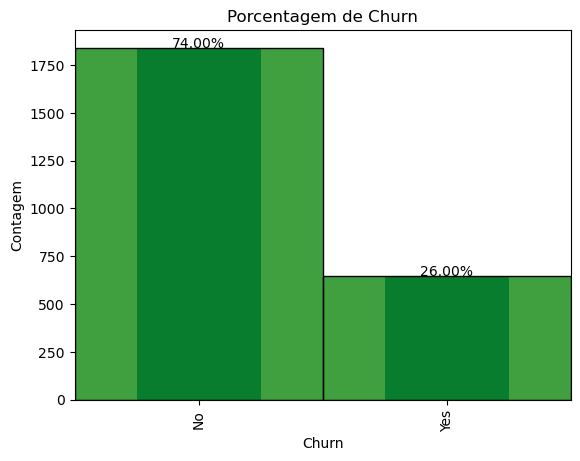

In [260]:
contagem_churn = df['Churn'].value_counts()
ax = contagem_churn.plot(kind='bar')
porcentagem = (contagem_churn / contagem_churn.sum()) * 100

for i, v in enumerate(contagem_churn):
    ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')
sns.histplot(data=df, x='Churn', bins=20, color='green')
plt.title('Porcentagem de Churn')
plt.ylabel('Contagem')
plt.show()

C:\Users\large\AppData\Local\Temp\ipykernel_9792\4124554615.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Tempo_Categoria", palette='viridis')


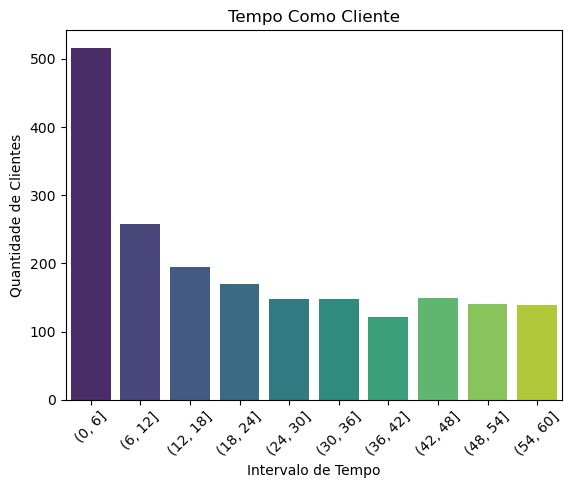

In [100]:
df['Tempo_Categoria'] = pd.cut(df['Tempo_como_Cliente'], bins=[0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60])

sns.countplot(data=df, x="Tempo_Categoria", palette='viridis')
plt.title("Tempo Como Cliente")
plt.xlabel("Intervalo de Tempo")
plt.ylabel("Quantidade de Clientes")
plt.xticks(rotation=45)
plt.show()

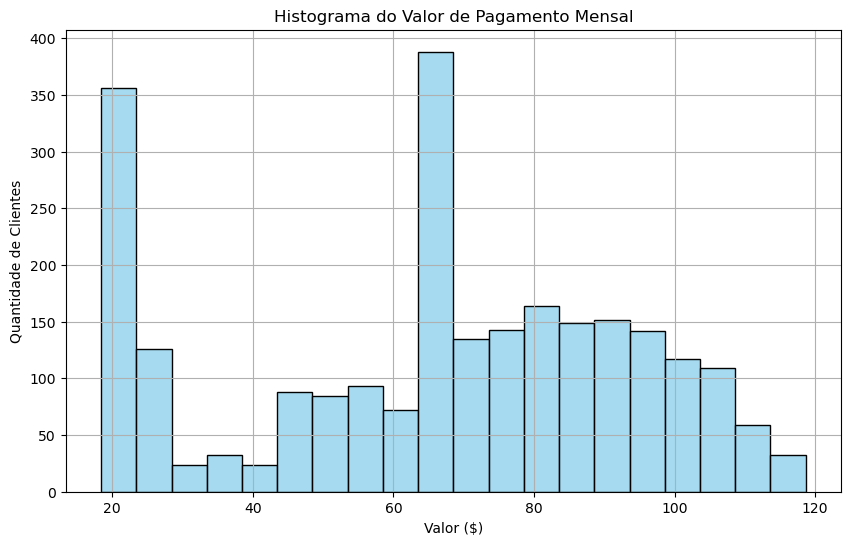

In [156]:
plt.figure(figsize=(10,6))
plt.grid(True)
sns.histplot(data=df, x='Pagamento_Mensal', bins=20, color='skyblue')
plt.xlabel('Valor ($)')
plt.title('Histograma do Valor de Pagamento Mensal')
plt.ylabel('Quantidade de Clientes')
plt.show()

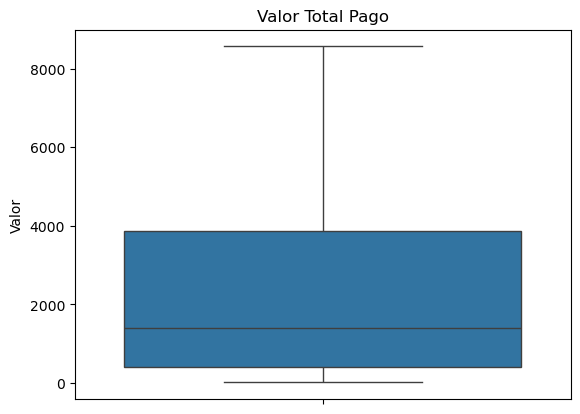

In [222]:
sns.boxplot(data=df,y='Total_Pago')
plt.ylabel("Valor")
plt.title("Valor Total Pago")
plt.show()

In [247]:
df['Servico_Internet'].unique()

array(['Dsl', 'No', 'Fiber Optic'], dtype=object)

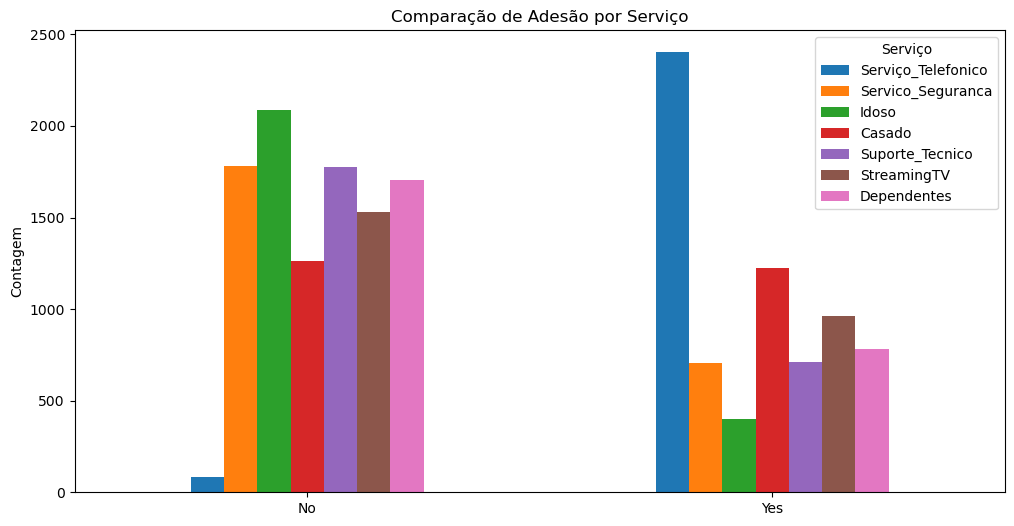

In [251]:
df['Servico_Seguranca']=df['Servico_Seguranca'].replace({'No internet service':'No'})
df['Suporte_Tecnico']=df['Suporte_Tecnico'].replace({'No internet service':'No'})
df['StreamingTV']=df['StreamingTV'].replace({'No internet service':'No'})
df['Idoso']=df['Idoso'].astype(str)
df['Idoso']=df['Idoso'].replace({'0':'No', '1':'Yes'})
df['Servico_Internet'].unique()

df_plot = df[['Serviço_Telefonico', 'Servico_Seguranca', 'Idoso', 'Casado',
              'Suporte_Tecnico', 'StreamingTV', 'Dependentes',]].apply(pd.Series.value_counts)
df_plot.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title("Comparação de Adesão por Serviço")
plt.ylabel("Contagem")
plt.xticks(rotation=0)
plt.legend(title='Serviço')
plt.show()

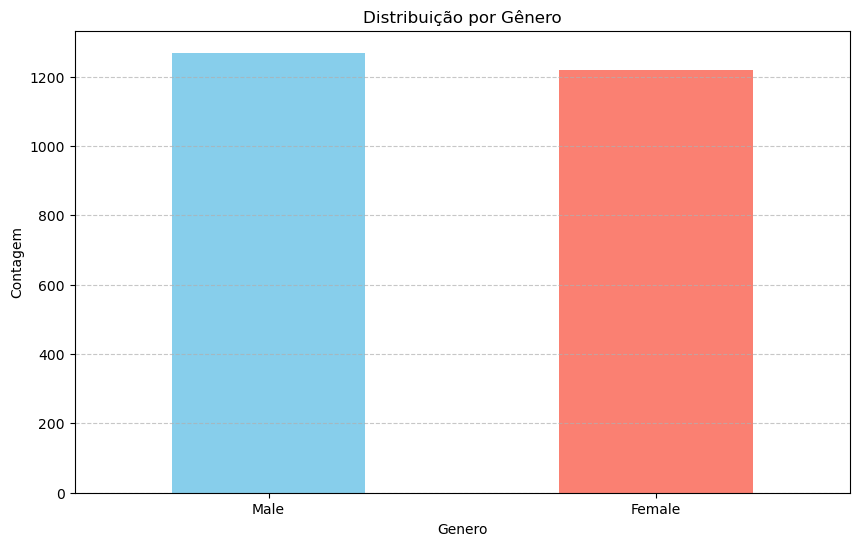

In [277]:
counts = df['Genero'].value_counts()

counts.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title("Distribuição por Gênero")
plt.ylabel("Contagem")
plt.xticks(rotation=0)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3) Identifique e trate as colunas que contém outliers.
Caso opte por mante-los ou altera-los justifique sua escolha.


## Explicação 3:
#### Coluna "Total_Pago":

Essa foi a única coluna que me despertou um alerta sobre outliers. Após analisar mais detalhadamente, concluí que são dados legítimos; não aparenta que tenhamos dados mal digitados ou errôneos. A distribuição irregular se dá ao fato de termos clientes que permanecem pouco tempo com a nossa marca e consomem o nosso serviço mais básico, fazendo com que o valor total pago seja baixo. Por outro lado, podemos ver clientes fiéis que possuem pacotes de serviços mais robustos, tornando assim o saldo total de pagamento mais volumoso.

As demaiss colunas possuem um comportamento bem regular, não indicando a presença de outliers.

In [12]:
df.columns.to_list()

['customerID',
 'Genero',
 'Idoso',
 'Casado',
 'Dependentes',
 'Tempo_como_Cliente',
 'Serviço_Telefonico',
 'Servico_Internet',
 'Servico_Seguranca',
 'Suporte_Tecnico',
 'StreamingTV',
 'Tipo_Contrato',
 'Forma_Pagamento',
 'Pagamento_Mensal',
 'Total_Pago',
 'Churn']

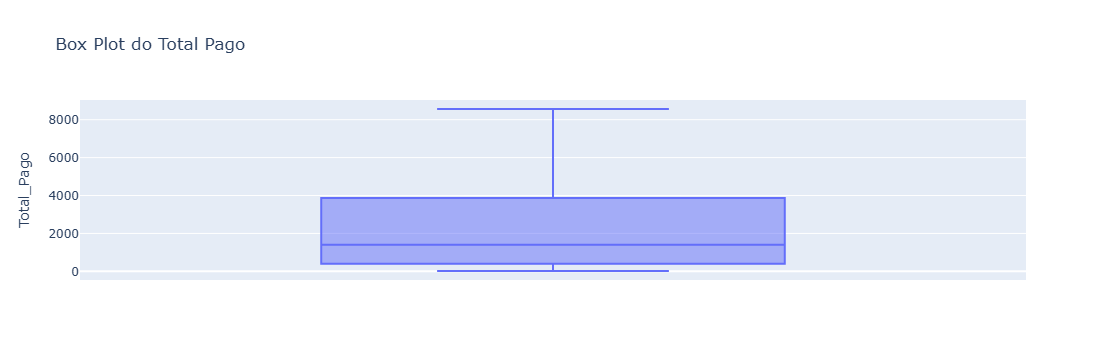

In [40]:
fig = px.box(df, y='Total_Pago', title='Box Plot do Total Pago')
fig.show()

In [44]:
df['Total_Pago'].astype(int)

0         29
1       1889
2        108
3       1840
4       1022
        ... 
2483     814
2484     388
2485      93
2486    1389
2487    2894
Name: Total_Pago, Length: 2488, dtype: int32

In [56]:
df['Total_Pago'].isnull().sum()

0

In [60]:
df['Total_Pago'].unique()

array([  29.85, 1889.5 ,  108.15, ...,   93.45, 1389.85, 2894.55])

In [48]:
df['Total_Pago'].mean()

2290.0871784565916

In [50]:
df['Total_Pago'].median()

1402.9

# 4) Realize a etapa da análise bivariada:
A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.


B) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?

## Explicação 4.a:
#### "Tempo_como_Cliente" X "Churn":
Clientes que deram Churn raramente ultrapassam 2 anos de relacionamento conosco. Em um mercado competitivo como o de telecomunicações, esse padrão exige ação imediata.

#### "Tipo de Contrato" X "Churn":
Clientes com planos mensais apresentam taxas de churn significativamente maiores, revelando uma desconfiança latente quanto à qualidade do serviço, que muitas vezes já existe antes mesmo da contratação.

#### "Pagamento Mensal" X "Churn":
Observamos que os clientes que deram churn realizavam pagamentos mensais mais altos, provavelmente por possuírem pacotes com mais serviços adicionais. Essa análise reforça a hipótese de que nossos serviços extras - que não são nosso carro-chefe - não estão atendendo às expectativas dos clientes.

#### "Média Tempo como Cliente por Valor Mensal":
A análise demonstra que clientes mais antigos apresentam um valor médio mensal consistentemente maior, sugerindo um aumento progressivo de engajamento com nossos serviços ao longo do tempo.

#### "Gênero" X "Churn":
Os dados revelam uma distribuição equilibrada de churn entre gêneros, indicando que esta variável não apresenta correlação significativa com o cancelamento.

#### "Dependentes" X "Churn":
A análise quantitativa revela que 83% dos cancelamentos ocorrem entre clientes sem dependenteS, indicando que a ausência de vínculos familiares reduz em 2,3x a retenção de clientes.

## Explicação 4.b:
Nossa análise identificou quatro drivers principais de churn:

1. Tempo como Cliente
2. Valor mensal 
3. Ausência de dependentes
4. Pacote de serviços contratados

Embora não seja uma coluna do nosso DataFrame, pude identificar um padrão de insatisfação com nossos serviços não essenciais.

In [67]:
df.columns.to_list()

['customerID',
 'Genero',
 'Idoso',
 'Casado',
 'Dependentes',
 'Tempo_como_Cliente',
 'Serviço_Telefonico',
 'Servico_Internet',
 'Servico_Seguranca',
 'Suporte_Tecnico',
 'StreamingTV',
 'Tipo_Contrato',
 'Forma_Pagamento',
 'Pagamento_Mensal',
 'Total_Pago',
 'Churn']

C:\Users\large\AppData\Local\Temp\ipykernel_4864\3305217291.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




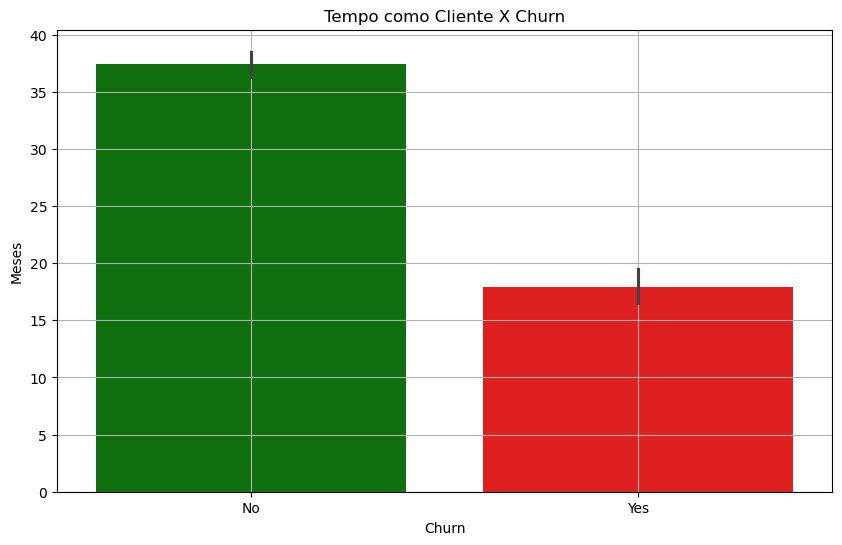

In [215]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Churn', y='Tempo_como_Cliente', palette=["green", 'red'])
plt.grid(True)
plt.title('Tempo como Cliente X Churn')
plt.ylabel('Meses')
plt.show()

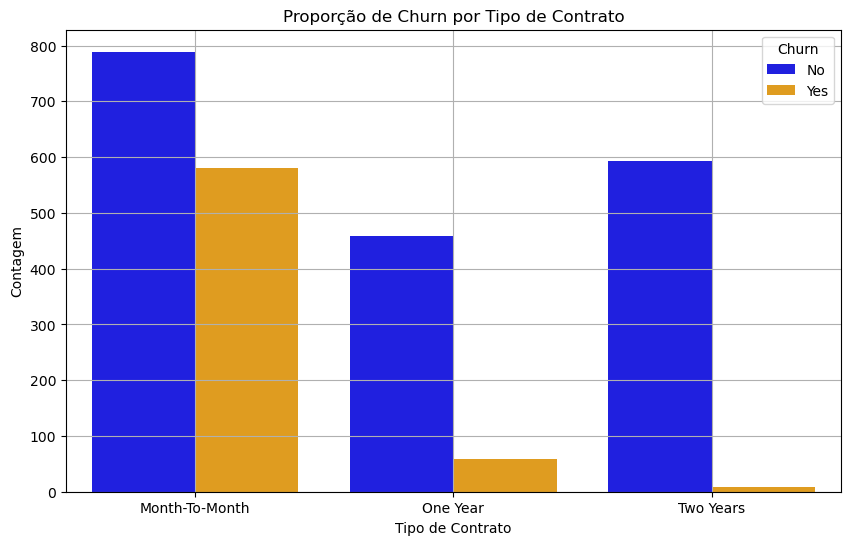

In [120]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Tipo_Contrato', hue='Churn', palette=['blue', 'orange'])
plt.title('Proporção de Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Contagem')
plt.grid(True)
plt.show()

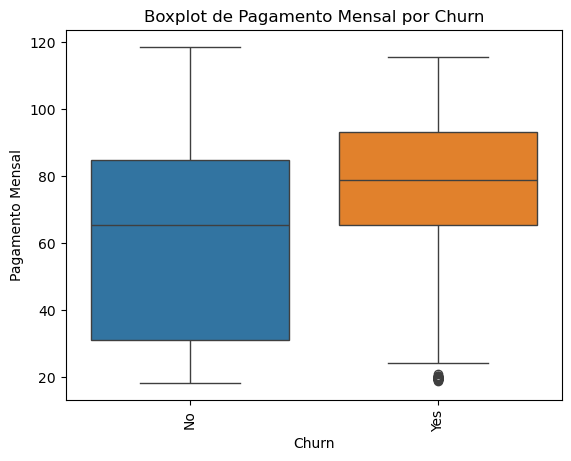

In [197]:
sns.boxplot(data=df, x='Churn', y='Pagamento_Mensal', hue='Churn')
plt.title('Boxplot de Pagamento Mensal por Churn')
plt.ylabel('Pagamento Mensal')
plt.xticks(rotation=90)
plt.show()

In [143]:
df.groupby('Churn')['Pagamento_Mensal'].mean()

Churn
No     62.214766
Yes    75.261565
Name: Pagamento_Mensal, dtype: float64

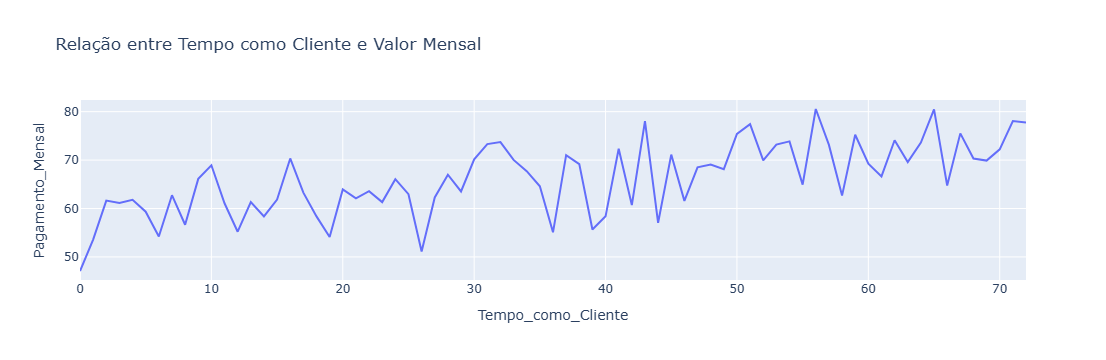

In [199]:
media_tempo_por_valor_mensal= df.groupby('Tempo_como_Cliente')['Pagamento_Mensal'].mean().reset_index()

fig = px.line(media_tempo_por_valor_mensal, x='Tempo_como_Cliente', y='Pagamento_Mensal',
              title='Relação entre Tempo como Cliente e Valor Mensal',)

fig.show()

In [171]:
df.groupby('Tempo_como_Cliente')['Pagamento_Mensal'].mean()

Tempo_como_Cliente
0     47.090000
1     53.585979
2     61.634431
3     61.154872
4     61.802461
        ...    
68    70.309848
69    69.888903
70    72.221861
71    78.061464
72    77.764809
Name: Pagamento_Mensal, Length: 73, dtype: float64

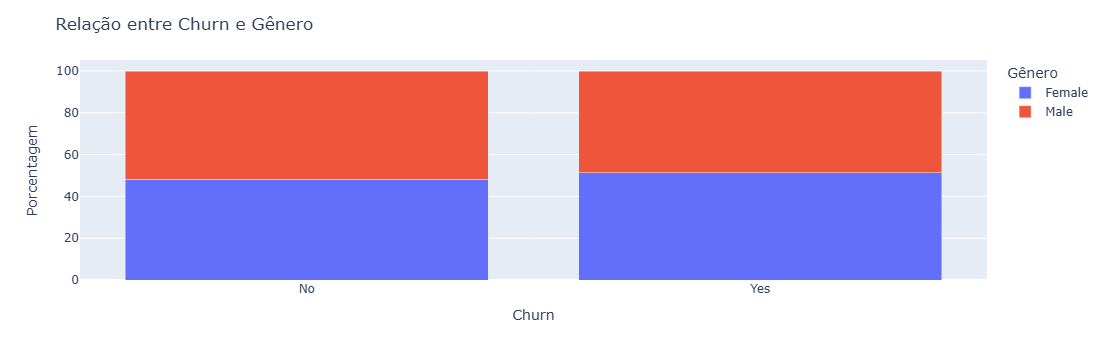

In [173]:
df_grouped = df.groupby(['Churn', 'Genero']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100


fig = px.bar(df_grouped, x='Churn', y='percent', color='Genero', barmode='stack',
             labels={'Churn': 'Churn', 'percent': 'Porcentagem', 'Genero': 'Gênero'})

fig.update_layout(title='Relação entre Churn e Gênero',
                  yaxis_title='Porcentagem',
                  legend_title='Gênero')
fig.show()

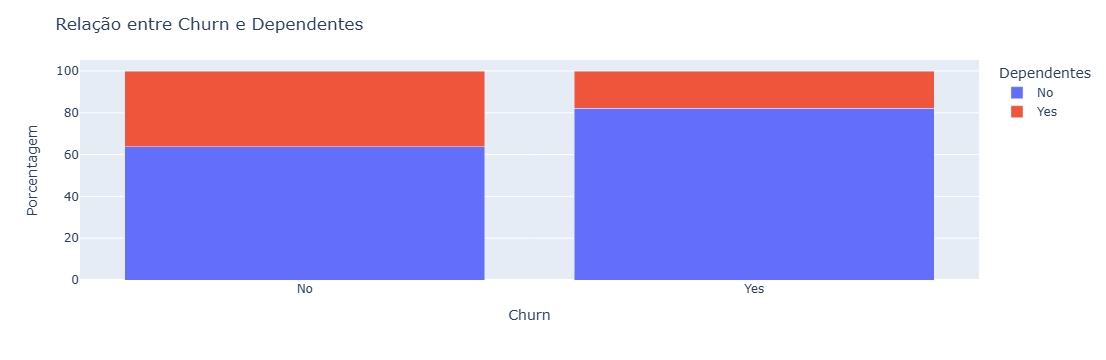

In [177]:
df_grouped = df.groupby(['Churn', 'Dependentes']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100


fig = px.bar(df_grouped, x='Churn', y='percent', color='Dependentes', barmode='stack',
             labels={'Churn': 'Churn', 'percent': 'Porcentagem'})

fig.update_layout(title='Relação entre Churn e Dependentes',
                  yaxis_title='Porcentagem',
                  legend_title='Dependentes')
fig.show()